In [1]:
import numpy as np
import math

In [2]:
L, d_k, d_v = 4, 8, 8
q = np.random.randn(L, d_k)
k = np.random.randn(L, d_k)
v = np.random.randn(L, d_v)

In [3]:
print("Q\n",q)
print("K\n",k)
print("V\n",v)

Q
 [[-1.656742    0.7819573   0.52559618  0.93939726 -0.5625273   0.84864929
   1.19123949 -1.31573045]
 [ 1.1602606   0.71961949  1.73283649  0.70025501 -1.38885747 -0.6655259
   1.65544819 -0.83732698]
 [-0.13133191  0.56976407  0.02463137 -0.17135961  0.79378865 -0.037593
  -0.11494286  0.41844077]
 [-0.64231195  0.82531037  0.5615818   1.73076134 -0.3999727  -0.67738992
   0.88621169  0.03202868]]
K
 [[-1.07965948 -0.93033227  0.77991769  0.54198817  0.67621516  0.78237803
   0.54289299  0.97488506]
 [-1.8024289   0.65364501 -1.13887745 -1.1311632  -0.77045519 -0.68075642
  -0.39891236  0.19494474]
 [ 0.66989718  1.3563747   0.74030572 -1.61829959  0.21973164 -0.04224101
   0.01392261  2.27628322]
 [-0.82786793 -0.19886898  0.77990028 -0.79178142  1.52317783 -0.52038813
  -0.51767374 -1.73647756]]
V
 [[ 1.08490757 -0.43367479 -1.07236331 -1.82204064  1.60845676  0.64308658
   0.42560113  0.34021025]
 [ 0.03660966  0.24093147  0.0184248   1.0283842  -0.18074102  0.42931961
   0.6220

#Self Attention

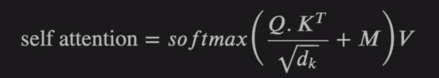

In [5]:
np.matmul(q,k.T)

array([[ 1.62790573,  0.96006463, -4.31818685,  1.25177869],
       [-1.56859749, -3.68700042, -0.2570733 , -1.47878942],
       [ 0.39094936,  0.31636149,  2.10727847,  0.71184055],
       [ 1.01360486, -0.47814314, -1.6700293 , -1.3358955 ]])

In [6]:
# Why do we need sqrt(d_k) in denominator
q.var(), k.var(), np.matmul(q,k.T).var()

(0.7849349121325702, 0.9752922016372961, 3.1594751348847465)

In [7]:
# variance of Q.K^T is more. So to stabilise, we divide with sqrt(d_k)
scaled = np.matmul(q,k.T) / math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(0.7849349121325702, 0.9752922016372961, 0.3949343918605933)

In [8]:
scaled

array([[ 0.57555159,  0.33943411, -1.5267096 ,  0.4425706 ],
       [-0.55458296, -1.3035515 , -0.09088914, -0.52283101],
       [ 0.13822147,  0.11185068,  0.74503545,  0.25167364],
       [ 0.35836343, -0.16904913, -0.59044452, -0.47231038]])

#Masking

This is to ensure that words do not get the context from the words generated in the future


Not required in the encoders, but required in the decoders



In [9]:
mask = np.tril(np.ones( (L, L)))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [10]:
mask[mask == 0] = -np.infty
mask[mask == 1] = 0

In [11]:
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [12]:
scaled + mask

array([[ 0.57555159,        -inf,        -inf,        -inf],
       [-0.55458296, -1.3035515 ,        -inf,        -inf],
       [ 0.13822147,  0.11185068,  0.74503545,        -inf],
       [ 0.35836343, -0.16904913, -0.59044452, -0.47231038]])

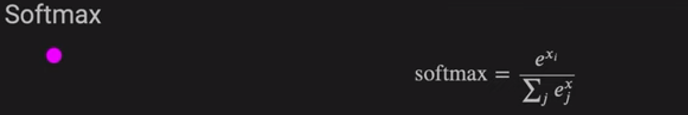

In [13]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

In [14]:
attention = softmax(scaled + mask)


In [15]:
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.67895391, 0.32104609, 0.        , 0.        ],
       [0.26256705, 0.25573345, 0.4816995 , 0.        ],
       [0.4144068 , 0.24455385, 0.16045927, 0.18058007]])

In [16]:
new_v = np.matmul(attention, v)
new_v

array([[ 1.08490757, -0.43367479, -1.07236331, -1.82204064,  1.60845676,
         0.64308658,  0.42560113,  0.34021025],
       [ 0.74835562, -0.21709508, -0.72217005, -0.90692288,  1.0340418 ,
         0.57445753,  0.48866498,  0.63860727],
       [-0.00888438,  0.72577197, -0.40094435,  0.09495987,  0.72802532,
         0.39982542, -0.38257716,  1.46929024],
       [ 0.03690395,  0.26997188, -0.43686894, -0.24641972,  0.87278903,
         0.76793685,  0.00683887,  0.72178578]])

In [17]:
v

array([[ 1.08490757, -0.43367479, -1.07236331, -1.82204064,  1.60845676,
         0.64308658,  0.42560113,  0.34021025],
       [ 0.03660966,  0.24093147,  0.0184248 ,  1.0283842 , -0.18074102,
         0.42931961,  0.62203353,  1.2696625 ],
       [-0.6292464 ,  1.61516974, -0.25760648,  0.64433422,  0.73057808,
         0.25156906, -1.35644896,  2.19071656],
       [-1.77579804,  0.72876252,  0.24562625,  0.85148709,  0.7376589 ,
         1.97186232, -0.57591636, -0.44978001]])

In [19]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None):
  d_k = q.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled)
  out = np.matmul(attention, v)
  return out, attention

In [20]:
values, attention = scaled_dot_product_attention(q, k, v, mask=mask)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[-1.656742    0.7819573   0.52559618  0.93939726 -0.5625273   0.84864929
   1.19123949 -1.31573045]
 [ 1.1602606   0.71961949  1.73283649  0.70025501 -1.38885747 -0.6655259
   1.65544819 -0.83732698]
 [-0.13133191  0.56976407  0.02463137 -0.17135961  0.79378865 -0.037593
  -0.11494286  0.41844077]
 [-0.64231195  0.82531037  0.5615818   1.73076134 -0.3999727  -0.67738992
   0.88621169  0.03202868]]
K
 [[-1.07965948 -0.93033227  0.77991769  0.54198817  0.67621516  0.78237803
   0.54289299  0.97488506]
 [-1.8024289   0.65364501 -1.13887745 -1.1311632  -0.77045519 -0.68075642
  -0.39891236  0.19494474]
 [ 0.66989718  1.3563747   0.74030572 -1.61829959  0.21973164 -0.04224101
   0.01392261  2.27628322]
 [-0.82786793 -0.19886898  0.77990028 -0.79178142  1.52317783 -0.52038813
  -0.51767374 -1.73647756]]
V
 [[ 1.08490757 -0.43367479 -1.07236331 -1.82204064  1.60845676  0.64308658
   0.42560113  0.34021025]
 [ 0.03660966  0.24093147  0.0184248   1.0283842  -0.18074102  0.42931961
   0.6220